In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

# 🔧 Cài đặt YOLOv11

> Thêm khối trích dẫn



# 🚀 Import thư viện


In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


2. Tải và giải nén dataset từ saurieng.zip

In [ ]:
import requests

# URL của file
url = "https://app.roboflow.com/ds/bVXwsdCTV7?key=Q7A4yvkeS8"

# Tên file đầu ra
output_file = "train.zip"

# Gửi request GET để tải file
response = requests.get(url, stream=True)

# Kiểm tra nếu request thành công (status code 200)
if response.status_code == 200:
    # Mở file ở chế độ ghi nhị phân và ghi dữ liệu
    with open(output_file, "wb") as file:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:  # Ghi từng chunk
                file.write(chunk)
    print(f"File đã được tải xuống thành công: {output_file}")
else:
    print(f"Lỗi khi tải file: {response.status_code}")



import zipfile
import os

# Tạo thư mục nếu chưa có
os.makedirs("/content/dataset", exist_ok=True)

# Giải nén file zip
with zipfile.ZipFile("/content/train.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")

File đã được tải xuống thành công: train.zip


📌 3. Kiểm tra file data.yaml


In [ ]:
!cat /content/dataset/data.yaml


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['Healthy', 'Unhealthy']

roboflow:
  workspace: testapi-ie6o4
  project: cachua-s3kxu
  version: 5
  license: CC BY 4.0
  url: https://universe.roboflow.com/testapi-ie6o4/cachua-s3kxu/dataset/5

In [ ]:
from ultralytics import YOLO

# Khởi tạo model, có thể thay bằng model bạn muốn (vd: yolov8n.pt, yolov8s.pt, yolov11n.pt)
model = YOLO("yolov8n.pt")

# Train model
results = model.train(
    data="/content/dataset/data.yaml",  # Đường dẫn tới file data.yaml
    epochs=500,                         # Số epoch train
    imgsz=640,                          # Kích thước ảnh
    batch=220,                          # Batch size
    name="train",                       # Tên model lưu kết quả
    patience=10,                        # Early stopping
    save=True,                          # Lưu kết quả
    exist_ok=True                       # Ghi đè nếu folder đã tồn tại
)

Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=220, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=500, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0,

train: Scanning /content/dataset/train/labels.cache... 7731 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7731/7731 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 116, len(boxes) = 16794. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 321.2±147.1 MB/s, size: 20.7 KB)


val: Scanning /content/dataset/valid/labels.cache... 1707 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1707/1707 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 616, len(boxes) = 3739. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00171875), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      36.8G      1.122      2.579      1.469        147        640: 100%|██████████| 36/36 [00:40<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.72s/it]


                   all       1707       3739     0.0055       0.66      0.361      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      36.1G     0.9778      1.467      1.316        221        640: 100%|██████████| 36/36 [00:21<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.56s/it]


                   all       1707       3739       0.93      0.303      0.494      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      36.1G      0.982      1.238        1.3        124        640: 100%|██████████| 36/36 [00:21<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.11s/it]


                   all       1707       3739      0.553      0.365      0.445      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      38.2G     0.9959      1.122      1.313        129        640: 100%|██████████| 36/36 [00:21<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.93s/it]


                   all       1707       3739       0.39      0.346      0.283      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      37.7G      0.988      1.018      1.308        196        640: 100%|██████████| 36/36 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.87s/it]

                   all       1707       3739      0.546      0.487      0.477      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      38.2G     0.9769      0.963      1.299        200        640: 100%|██████████| 36/36 [00:21<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.92s/it]

                   all       1707       3739      0.518      0.403      0.387      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      37.6G     0.9434     0.9139      1.283         92        640: 100%|██████████| 36/36 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.80s/it]

                   all       1707       3739      0.687      0.461      0.523      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      37.4G      0.946     0.8788      1.283        113        640: 100%|██████████| 36/36 [00:21<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.91s/it]

                   all       1707       3739      0.574      0.451      0.495      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      38.1G     0.9497     0.8704       1.28        212        640: 100%|██████████| 36/36 [00:21<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.91s/it]

                   all       1707       3739      0.784       0.56      0.661      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      37.7G     0.9305     0.8443      1.267        130        640: 100%|██████████| 36/36 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.91s/it]

                   all       1707       3739      0.714      0.556      0.621      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500        38G     0.9299     0.8277      1.262        243        640: 100%|██████████| 36/36 [00:21<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.77s/it]

                   all       1707       3739      0.754      0.544      0.632      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      38.1G     0.9087      0.814      1.256        218        640: 100%|██████████| 36/36 [00:21<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.98s/it]

                   all       1707       3739      0.779      0.563      0.654      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      38.3G     0.9072     0.7967      1.256         95        640: 100%|██████████| 36/36 [00:21<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.78s/it]

                   all       1707       3739      0.795      0.579      0.674      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      38.1G     0.9034     0.7865      1.242        130        640: 100%|██████████| 36/36 [00:22<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.79s/it]

                   all       1707       3739       0.74      0.593      0.671      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      37.7G     0.9005     0.7705      1.247        186        640: 100%|██████████| 36/36 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.81s/it]

                   all       1707       3739      0.717       0.55      0.623      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      36.9G     0.9041     0.7855      1.256       1032        640:  42%|████▏     | 15/36 [00:09<00:12,  1.62it/s]

WARNING ⚠️ CUDA OutOfMemoryError in TaskAlignedAssigner, using CPU


     16/500      36.9G     0.9005     0.7788      1.244        190        640: 100%|██████████| 36/36 [00:43<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.86s/it]

                   all       1707       3739      0.804      0.612      0.705      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      37.6G     0.8833     0.7576      1.235        151        640: 100%|██████████| 36/36 [00:21<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.89s/it]

                   all       1707       3739      0.782      0.595      0.653      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      36.8G      0.879     0.7506      1.239        142        640: 100%|██████████| 36/36 [00:21<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.87s/it]

                   all       1707       3739      0.746       0.59      0.658      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      37.8G     0.8717     0.7393      1.228        211        640: 100%|██████████| 36/36 [00:21<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.86s/it]

                   all       1707       3739      0.798      0.582      0.673      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      36.3G     0.8588     0.7313      1.223        112        640: 100%|██████████| 36/36 [00:21<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.77s/it]

                   all       1707       3739      0.781      0.563      0.654      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500        37G     0.8647     0.7261      1.228        102        640: 100%|██████████| 36/36 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.82s/it]

                   all       1707       3739      0.789      0.506      0.597      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      37.5G      0.879     0.7338      1.228        121        640: 100%|██████████| 36/36 [00:21<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.78s/it]

                   all       1707       3739      0.815      0.582      0.678      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      36.2G     0.8491     0.7137      1.221        138        640: 100%|██████████| 36/36 [00:21<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.91s/it]

                   all       1707       3739      0.805      0.624      0.717      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      37.5G     0.8649     0.7303      1.223        154        640: 100%|██████████| 36/36 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.82s/it]

                   all       1707       3739      0.754      0.533      0.616      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      35.8G     0.8675     0.7207      1.229        173        640: 100%|██████████| 36/36 [00:21<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.83s/it]

                   all       1707       3739      0.808      0.619      0.711      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500        37G     0.8504     0.7004      1.221        130        640: 100%|██████████| 36/36 [00:22<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.77s/it]

                   all       1707       3739      0.758      0.607      0.687      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      37.7G     0.8511     0.7024      1.214        158        640: 100%|██████████| 36/36 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.86s/it]

                   all       1707       3739      0.791      0.615      0.704      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      38.2G     0.8493     0.6876      1.213        144        640: 100%|██████████| 36/36 [00:21<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.83s/it]

                   all       1707       3739      0.766      0.621      0.695      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      37.5G     0.8478     0.6845      1.209        119        640: 100%|██████████| 36/36 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.83s/it]

                   all       1707       3739      0.798      0.633       0.72      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      37.9G     0.8459     0.6813      1.209        138        640: 100%|██████████| 36/36 [00:21<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.79s/it]

                   all       1707       3739      0.682      0.548      0.601      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      37.9G     0.8349     0.6834      1.211        139        640: 100%|██████████| 36/36 [00:21<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.84s/it]

                   all       1707       3739      0.742      0.596      0.663      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      38.2G     0.8434      0.685      1.206        241        640: 100%|██████████| 36/36 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.93s/it]

                   all       1707       3739      0.778      0.631      0.713      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500        36G     0.8417     0.6702      1.204        224        640: 100%|██████████| 36/36 [00:21<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.84s/it]

                   all       1707       3739      0.785      0.629      0.709      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      37.5G     0.8421     0.6708      1.196        163        640: 100%|██████████| 36/36 [00:21<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.88s/it]

                   all       1707       3739       0.82      0.618      0.724      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      35.2G     0.8323     0.6677      1.201        187        640: 100%|██████████| 36/36 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.81s/it]

                   all       1707       3739      0.707      0.585       0.64      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      36.7G     0.8264     0.6639      1.203        128        640: 100%|██████████| 36/36 [00:21<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.71s/it]

                   all       1707       3739       0.82      0.598      0.693      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      36.4G     0.8425     0.6664        1.2        151        640: 100%|██████████| 36/36 [00:21<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.93s/it]

                   all       1707       3739      0.804      0.609      0.703      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      38.6G     0.8136     0.6562      1.193        153        640: 100%|██████████| 36/36 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.84s/it]

                   all       1707       3739      0.792      0.606      0.695      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      35.8G     0.8202     0.6566        1.2        108        640: 100%|██████████| 36/36 [00:21<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.84s/it]

                   all       1707       3739      0.814      0.636      0.724      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      36.8G     0.8322     0.6596      1.199        133        640: 100%|██████████| 36/36 [00:22<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.83s/it]

                   all       1707       3739      0.806      0.596      0.695       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      37.5G     0.8217     0.6462      1.191        121        640: 100%|██████████| 36/36 [00:21<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.78s/it]

                   all       1707       3739      0.859      0.621       0.73      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      36.9G       0.83     0.6588      1.193        102        640: 100%|██████████| 36/36 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.81s/it]

                   all       1707       3739      0.775      0.614      0.695      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      35.7G     0.8142     0.6426      1.184        150        640: 100%|██████████| 36/36 [00:21<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.80s/it]

                   all       1707       3739      0.829      0.635      0.739       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      37.9G     0.8121     0.6396      1.186        148        640: 100%|██████████| 36/36 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.82s/it]

                   all       1707       3739      0.826      0.636      0.732      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      36.8G     0.8374     0.6531      1.189        176        640: 100%|██████████| 36/36 [00:22<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.73s/it]

                   all       1707       3739       0.82      0.655      0.755      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500        38G     0.8236     0.6435      1.195        132        640: 100%|██████████| 36/36 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.87s/it]

                   all       1707       3739      0.837      0.653      0.757       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      36.9G     0.8177     0.6362      1.185        138        640: 100%|██████████| 36/36 [00:21<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.65s/it]

                   all       1707       3739      0.814      0.642       0.73      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500        37G      0.808     0.6349      1.186        241        640: 100%|██████████| 36/36 [00:21<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.83s/it]

                   all       1707       3739       0.83      0.621      0.718      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      36.5G     0.8103     0.6308      1.183         93        640: 100%|██████████| 36/36 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.74s/it]

                   all       1707       3739      0.786      0.635      0.724      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      36.6G     0.8159     0.6399      1.196        161        640: 100%|██████████| 36/36 [00:21<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.80s/it]

                   all       1707       3739      0.813      0.649      0.737      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      38.5G     0.8131     0.6262      1.187        127        640: 100%|██████████| 36/36 [00:21<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.82s/it]

                   all       1707       3739      0.843      0.601      0.709      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      38.3G      0.803     0.6295      1.185        173        640: 100%|██████████| 36/36 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.79s/it]

                   all       1707       3739      0.812       0.58      0.683      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      36.9G      0.801     0.6254      1.179        111        640: 100%|██████████| 36/36 [00:21<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.84s/it]

                   all       1707       3739      0.609      0.531      0.526      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      38.5G     0.8091     0.6257      1.181        111        640: 100%|██████████| 36/36 [00:21<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.84s/it]

                   all       1707       3739      0.819      0.645      0.736      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      36.5G     0.7904     0.6149      1.179        191        640: 100%|██████████| 36/36 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.79s/it]

                   all       1707       3739      0.823      0.668      0.759      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500        36G     0.8008     0.6182      1.177        225        640: 100%|██████████| 36/36 [00:21<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.93s/it]

                   all       1707       3739      0.799      0.629      0.715      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      35.4G     0.7914     0.6132      1.174        107        640: 100%|██████████| 36/36 [00:22<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.71s/it]

                   all       1707       3739      0.837      0.636      0.736      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      37.9G     0.8036     0.6181      1.179        133        640: 100%|██████████| 36/36 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.88s/it]

                   all       1707       3739      0.841      0.647      0.749      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      36.6G     0.8034      0.609      1.183        119        640: 100%|██████████| 36/36 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.74s/it]

                   all       1707       3739      0.774      0.574       0.65      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      36.6G     0.8032     0.6321       1.18       1036        640:  36%|███▌      | 13/36 [00:08<00:14,  1.60it/s]

WARNING ⚠️ CUDA OutOfMemoryError in TaskAlignedAssigner, using CPU


     60/500      37.3G     0.7956     0.6158      1.174        134        640: 100%|██████████| 36/36 [00:54<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.81s/it]

                   all       1707       3739      0.807      0.664      0.749      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      38.2G     0.7883     0.5999      1.171        152        640: 100%|██████████| 36/36 [00:21<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.82s/it]

                   all       1707       3739      0.809      0.637      0.723      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      37.5G     0.7927     0.6029      1.173        111        640: 100%|██████████| 36/36 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.72s/it]

                   all       1707       3739      0.784       0.67      0.735      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      38.3G     0.7807     0.5995      1.172        113        640: 100%|██████████| 36/36 [00:21<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.83s/it]

                   all       1707       3739      0.836      0.663      0.748      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      37.2G     0.7884     0.6007      1.172        118        640: 100%|██████████| 36/36 [00:21<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.73s/it]

                   all       1707       3739      0.835      0.643       0.73      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      37.5G     0.7724     0.5839      1.164        113        640: 100%|██████████| 36/36 [00:21<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.85s/it]

                   all       1707       3739      0.848      0.637      0.737      0.586
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 55, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



65 epochs completed in 0.564 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:10<00:00,  2.61s/it]


                   all       1707       3739      0.822      0.667      0.759      0.599
               Healthy        434       1553      0.786      0.534      0.621      0.456
             Unhealthy       1304       2186      0.858      0.801      0.896      0.741
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train


Import và vẽ phân tích training logs

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


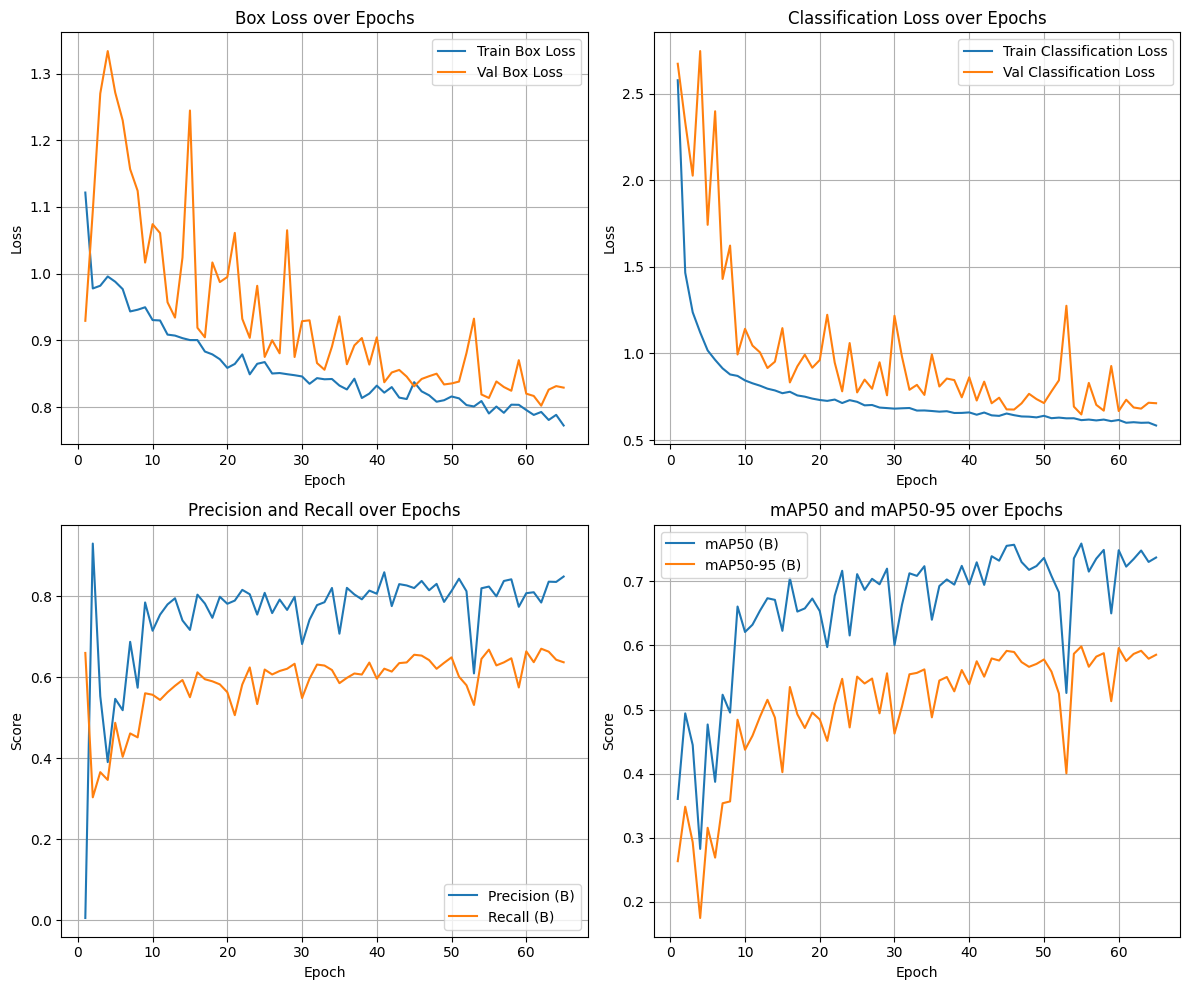

Final Results: 
epoch                     65.000000
time                    2028.890000
train/box_loss             0.772410
train/cls_loss             0.583910
train/dfl_loss             1.164210
metrics/precision(B)       0.848210
metrics/recall(B)          0.636620
metrics/mAP50(B)           0.737250
metrics/mAP50-95(B)        0.585540
val/box_loss               0.829190
val/cls_loss               0.712600
val/dfl_loss               1.235020
lr/pg0                     0.008733
lr/pg1                     0.008733
lr/pg2                     0.008733
Name: 64, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("runs/detect/train/results.csv")
print(df.columns)


# Vẽ đồ thị của các chỉ số huấn luyện và kiểm tra
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
results = pd.read_csv("runs/detect/train/results.csv")


# Đồ thị loss của huấn luyện (train) và kiểm tra (val)
ax[0, 0].plot(results['epoch'], results['train/box_loss'], label='Train Box Loss')
ax[0, 0].plot(results['epoch'], results['val/box_loss'], label='Val Box Loss')
ax[0, 0].set_title('Box Loss over Epochs')
ax[0, 0].set_xlabel('Epoch')
ax[0, 0].set_ylabel('Loss')
ax[0, 0].legend()
ax[0, 0].grid(True)  # Thêm grid

ax[0, 1].plot(results['epoch'], results['train/cls_loss'], label='Train Classification Loss')
ax[0, 1].plot(results['epoch'], results['val/cls_loss'], label='Val Classification Loss')
ax[0, 1].set_title('Classification Loss over Epochs')
ax[0, 1].set_xlabel('Epoch')
ax[0, 1].set_ylabel('Loss')
ax[0, 1].legend()
ax[0, 1].grid(True)  # Thêm grid

# Đồ thị precision và recall
ax[1, 0].plot(results['epoch'], results['metrics/precision(B)'], label='Precision (B)')
ax[1, 0].plot(results['epoch'], results['metrics/recall(B)'], label='Recall (B)')
ax[1, 0].set_title('Precision and Recall over Epochs')
ax[1, 0].set_xlabel('Epoch')
ax[1, 0].set_ylabel('Score')
ax[1, 0].legend()
ax[1, 0].grid(True)  # Thêm grid

# Đồ thị mAP
ax[1, 1].plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP50 (B)')
ax[1, 1].plot(results['epoch'], results['metrics/mAP50-95(B)'], label='mAP50-95 (B)')
ax[1, 1].set_title('mAP50 and mAP50-95 over Epochs')
ax[1, 1].set_xlabel('Epoch')
ax[1, 1].set_ylabel('Score')
ax[1, 1].legend()
ax[1, 1].grid(True)  # Thêm grid

# Hiển thị các đồ thị
plt.tight_layout()
plt.show()

# In các chỉ số cuối cùng sau khi huấn luyện
final_results = results.iloc[-1]
print(f"Final Results: \n{final_results}")

Dự đoán trên ảnh/video để kiểm tra kết quả


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1272 /content/dataset/test/images/0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact-Sp-6254_JPG.rf.0e62108de2bf10c92ebc01a2acdf52bc.jpg: 640x640 1 Unhealthy, 7.1ms
image 2/1272 /content/dataset/test/images/03b6acc7-41a6-4670-b47c-bef6d4baea18___PSU_CG-2363_JPG.rf.d7c0a576c6857ca27609499c4863a6aa.jpg: 640x640 1 Unhealthy, 7.7ms
image 3/1272 /content/dataset/test/images/042d59c2-2fd8-45c2-91bb-c0a05dd07f30___RS_HL-0257_JPG.rf.e767f340d9c8d4d7a5c1

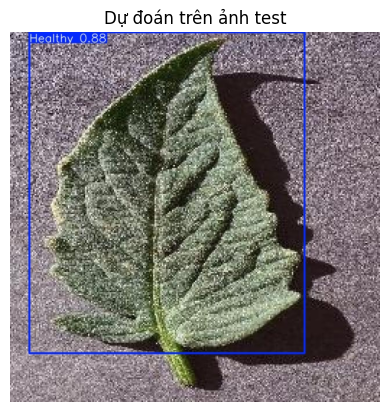

In [ ]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
import os

# Load model tốt nhất sau khi train
model = YOLO("runs/detect/train/weights/best.pt")

# Dự đoán trên một ảnh test
results = model.predict(source="/content/dataset/test/images", save=True, conf=0.25)

# Kiểm tra tên các tệp hình ảnh đã lưu trong thư mục predict
predict_folder = "runs/detect/predict/"
image_files = os.listdir(predict_folder)
print("Các tệp hình ảnh trong thư mục dự đoán:", image_files)

# Lựa chọn ảnh đầu tiên để hiển thị
if image_files:
    # Nếu có ảnh, lấy ảnh đầu tiên
    img_path = os.path.join(predict_folder, image_files[1])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Hiển thị ảnh
    plt.imshow(img)
    plt.axis("off")
    plt.title("Dự đoán trên ảnh test")
    plt.show()
else:
    print("Không tìm thấy ảnh nào trong thư mục dự đoán.")

Đánh giá trên tập test (giống validation)

In [ ]:
metrics = model.val(data="/content/dataset/data.yaml")
print(metrics)

Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1579.3±1042.3 MB/s, size: 85.6 KB)


val: Scanning /content/dataset/valid/labels.cache... 1707 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1707/1707 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 616, len(boxes) = 3739. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:09<00:00, 11.37it/s]


                   all       1707       3739      0.837      0.656      0.759      0.599
               Healthy        434       1553      0.804      0.522      0.621      0.457
             Unhealthy       1304       2186      0.871      0.791      0.897      0.742
Speed: 0.2ms preprocess, 1.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7839404a2690>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.

In [ ]:
import shutil

# Nén thư mục 'runs' thành file 'runs.zip'
shutil.make_archive('runs', 'zip', 'runs')

'/content/runs.zip'